# HEX algorithm **Kopuru Vespa Velutina Competition**

**Linear Regression model**

Purpose: Predict the number of Nests in each of Biscay's 112 municipalities for the year 2020.

Output: *(WaspBusters_20210609_batch_OLSy_48019prodigal.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Libraries

In [124]:
# Base packages -----------------------------------
import numpy as np
import pandas as pd

# Visualization -----------------------------------
from matplotlib import pyplot

# Scaling data ------------------------------------
from sklearn import preprocessing

# Linear Regression -------------------------------
from statsmodels.formula.api import ols
#from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


## Functions

In [125]:
# Function that checks if final Output is ready for submission or needs revision   

def check_data(HEX):

    if HEX.shape == (112, 3):
        print(HEX.shape,": Shape is correct.")
    else:
        print(HEX.shape,": Shape is **INCORRECT!**")

    if HEX["CODIGO MUNICIPIO"].nunique() == 112:
        print(HEX["CODIGO MUNICIPIO"].nunique(),": Number of unique municipalities is correct.")
    else:
        print(HEX["CODIGO MUNICIPIO"].nunique(),": Number of unique municipalities is **INCORRECT!**")
        
    if any(HEX["NIDOS 2020"] < 0):
        print("**INCORRECT!** At least one municipality has NESTS <= 0.")
    else:
        print("Great! All municipalities have NESTS >= 0.")
    
    print("The Total 2020 Nests' Prediction is", int(HEX["NIDOS 2020"].sum()))

## Get the data

In [126]:
QUEEN_train = pd.read_csv('../Feeder_years/WBds03_QUEENtrainYEARS.csv', sep=',')
QUEEN_predict = pd.read_csv('../Feeder_years/WBds03_QUEENpredictYEARS.csv', sep=',')

clusters = pd.read_csv("../Feeder_years/WBds_CLUSTERSnests.csv")

In [127]:
#QUEEN_predict.isnull().sum()

In [128]:
QUEEN_train.shape

(224, 40)

In [129]:
QUEEN_predict.shape

(112, 40)

## Add in more Clusters (nest amount clusters)

In [130]:
QUEEN_train = pd.merge(QUEEN_train, clusters, how = 'left', on = ['municip_code', 'municip_name'])
QUEEN_predict = pd.merge(QUEEN_predict, clusters, how = 'left', on = ['municip_code', 'municip_name'])

In [131]:
QUEEN_train.fillna(4, inplace=True)
QUEEN_predict.fillna(4, inplace=True)

In [132]:
QUEEN_train.shape

(224, 41)

In [133]:
QUEEN_predict.shape

(112, 41)

In [134]:
#QUEEN_train.isnull().sum()

In [135]:
#QUEEN_predict.isnull().sum()

In [136]:
QUEEN_predict.Cluster.value_counts()

0.0    66
2.0    41
1.0     4
4.0     1
Name: Cluster, dtype: int64

## Determine feature importance

In [137]:
X = QUEEN_train.drop(columns = ['municip_name', 'municip_code', 'NESTS', 'station_code'])

In [138]:
y = QUEEN_train['NESTS']

In [139]:
# Scale the datasets using MinMaxScaler

scalators = X.columns
X[scalators] = preprocessing.minmax_scale(X[scalators])

In [140]:
# define the model
model_fi = LinearRegression()

# fit the model
model_fi.fit(X, y)

# get importance
importance = model_fi.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (X.columns[i],v))

Feature: year_offset, Score: -23.73190
Feature: colonies_amount, Score: 10.86255
Feature: food_fruit, Score: 46.66294
Feature: food_apple, Score: -15.59673
Feature: food_txakoli, Score: 9.39300
Feature: food_kiwi, Score: -5.88189
Feature: food_pear, Score: -2.28616
Feature: food_blueberry, Score: 10.79788
Feature: food_raspberry, Score: 2.18019
Feature: weath_days_frost, Score: 14.52300
Feature: weath_humidity, Score: -8.86135
Feature: weath_maxLevel, Score: 26.32008
Feature: weath_midLevel, Score: -39.61315
Feature: weath_minLevel, Score: 28.34454
Feature: weath_days_rain, Score: 16.40050
Feature: weath_days_rain1mm, Score: 10.72795
Feature: weath_accuRainfall, Score: 3.07857
Feature: weath_10minRainfall, Score: 0.43578
Feature: weath_1dayRainfall, Score: 10.49641
Feature: weath_solar, Score: 4.29147
Feature: weath_meanTemp, Score: 14.61133
Feature: weath_maxTemp, Score: 10.57683
Feature: weath_maxMeanTemp, Score: -19.90402
Feature: weath_minTemp, Score: 19.40286
Feature: weath_meanWi

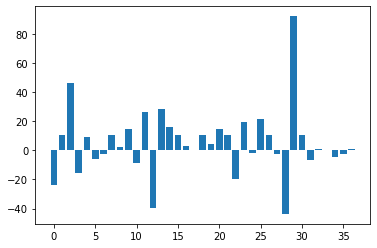

In [141]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [142]:
for i,v in enumerate(importance):
    if abs(v) > 10:
        print('Feature: %0s, Score: %.2f' % (X.columns[i],v))

Feature: year_offset, Score: -23.73
Feature: colonies_amount, Score: 10.86
Feature: food_fruit, Score: 46.66
Feature: food_apple, Score: -15.60
Feature: food_blueberry, Score: 10.80
Feature: weath_days_frost, Score: 14.52
Feature: weath_maxLevel, Score: 26.32
Feature: weath_midLevel, Score: -39.61
Feature: weath_minLevel, Score: 28.34
Feature: weath_days_rain, Score: 16.40
Feature: weath_days_rain1mm, Score: 10.73
Feature: weath_1dayRainfall, Score: 10.50
Feature: weath_meanTemp, Score: 14.61
Feature: weath_maxTemp, Score: 10.58
Feature: weath_maxMeanTemp, Score: -19.90
Feature: weath_minTemp, Score: 19.40
Feature: weath_maxWindM, Score: 21.71
Feature: weath_meanDayMaxWind, Score: 10.90
Feature: cluster_size, Score: -43.69
Feature: cluster_cosmo, Score: 92.28
Feature: cluster_survive, Score: 10.51


## Train the model

### With the variables suggested by the Feature Importance method

In [143]:
model = ols('NESTS ~ colonies_amount + food_fruit + food_apple + food_blueberry + weath_days_frost + weath_maxLevel + weath_midLevel + weath_minLevel + weath_days_rain + weath_days_rain1mm + weath_1dayRainfall + weath_meanTemp + weath_maxTemp + weath_maxMeanTemp + weath_minTemp + weath_maxWindM + weath_meanDayMaxWind + C(cluster_size) + C(cluster_cosmo) + C(cluster_survive)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     25.17
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           6.24e-47
Time:                        10:43:29   Log-Likelihood:                -932.68
No. Observations:                 224   AIC:                             1913.
Df Residuals:                     200   BIC:                             1995.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### Backward elimination

In [144]:
model = ols('NESTS ~ food_blueberry + weath_days_rain + weath_maxWindM + weath_meanDayMaxWind + C(cluster_size) + C(cluster_survive)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     64.93
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           2.61e-56
Time:                        10:43:29   Log-Likelihood:                -937.49
No. Observations:                 224   AIC:                             1895.
Df Residuals:                     214   BIC:                             1929.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### With the additional Cluster Categorical for nest amounts

In [145]:
model = ols('NESTS ~ food_blueberry + weath_days_rain + weath_maxWindM + weath_meanDayMaxWind + C(cluster_size) + C(cluster_survive) + C(Cluster)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     50.07
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           5.15e-55
Time:                        10:43:29   Log-Likelihood:                -934.03
No. Observations:                 224   AIC:                             1894.
Df Residuals:                     211   BIC:                             1938.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## Predict 2020's nests

In [146]:
y_2020 = model.predict(QUEEN_predict)
y_2020

0      24.645180
1      67.405564
2      12.130325
3      14.206928
4      99.902426
         ...    
107    29.995816
108    18.466810
109    29.943644
110    23.637522
111    12.577298
Length: 112, dtype: float64

In [147]:
# Any municipality resulting in NESTS<0 is equivalent to = 0

y_2020[y_2020 < 0] = 0
y_2020

0      24.645180
1      67.405564
2      12.130325
3      14.206928
4      99.902426
         ...    
107    29.995816
108    18.466810
109    29.943644
110    23.637522
111    12.577298
Length: 112, dtype: float64

In [148]:
QUEEN_predict['NESTS'] = y_2020

In [149]:
HEX = QUEEN_predict.loc[:,['municip_code','municip_name','NESTS']].groupby(by=['municip_code','municip_name'], as_index=False).sum()

In [150]:
y_2020.sum()

3257.4834405938464

## Manual adjustments

In [151]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,1.553138
21,48022,Karrantza Harana/Valle de Carranza,25.908488
50,48051,Lanestosa,18.092372
70,48071,Muskiz,11.198980
73,48074,Urduña/Orduña,28.563917
87,48088,Ubide,12.532641


In [152]:
# the following two steps are unnecessary, as the municipalities in question are already zero

#HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), 'NESTS'] = 0

In [153]:
#HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

In [154]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

## Verify dataset format

In [155]:
check_data(HEX)

(112, 3) : Shape is correct.
112 : Number of unique municipalities is correct.
Great! All municipalities have NESTS >= 0.
The Total 2020 Nests' Prediction is 3257


## Export dataset for submission

In [156]:
HEX.to_csv('WaspBusters_20210609_batch_OLSy_48019prodigal.csv', index=False)